In [174]:
using DelimitedFiles
path = "/home/minhhn/Documents/ML/Dataset/profit/profit.txt"
function readData(path)
    A = readdlm(path, ',')
    y = A[:,2]
    X = [ones(length(y)) A[:,1]]
    X, y    
end
X, y = readData(path)

([1.0 6.1101; 1.0 5.5277; … ; 1.0 13.394; 1.0 5.4369], [17.592, 9.1302, 13.662, 11.854, 6.8233, 11.886, 4.3483, 12.0, 6.5987, 3.8166  …  0.92695, 0.152, 2.8214, 1.8451, 4.2959, 7.2029, 1.9869, 0.14454, 9.0551, 0.61705])

# Step 2: plot data

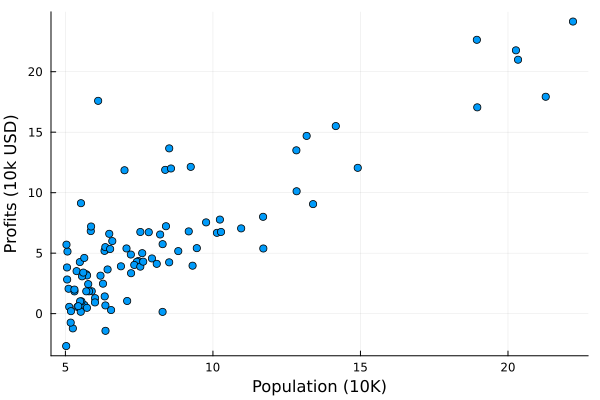

attempt to save state beyond implementation limit


In [175]:
using Plots
plot(X[:,2], y, st=:scatter, xlabel="Population (10K)", ylabel="Profits (10k USD)", legend=false)

# Step 3: Use the normal equation to estimate θ

In [176]:
train(X, y) = inv(X'*X)*X'*y

train (generic function with 1 method)

In [177]:
θ_best = train(X, y)

2-element Vector{Float64}:
 -3.895780878311882
  1.1930336441895961

In [178]:
x_min = minimum(X[:,2])
x_max = maximum(X[:,2])
predict(X, θ) = θ'*[1; X]
y_min = predict(x_min, θ_best)
y_max = predict(x_max, θ_best)

22.59314512362972

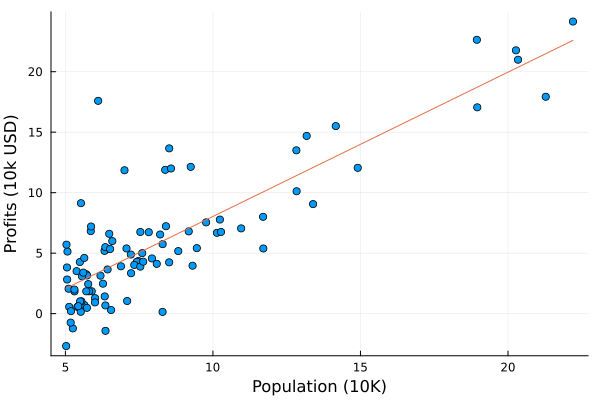

In [179]:
plot!([x_min, x_max], [y_min, y_max])

# Step 4: BGD

$$ θ_{t-1} = θ_1 - α_t∇J(θ_t) $$

In [180]:
function J(X, y, θ)
    ϵ = X*θ - y
    ϵ'*ϵ/(2*length(y)) # sum(ϵ .^ 2)/(2*length(y))
end

J (generic function with 1 method)

In [181]:
u = -5:0.1:5
v = -4:0.1:4
f(u,v) = J(X, y, [u;v])

f (generic function with 1 method)

In [182]:
U = repeat(u', length(v), 1)

81×101 Matrix{Float64}:
 -5.0  -4.9  -4.8  -4.7  -4.6  -4.5  …  4.4  4.5  4.6  4.7  4.8  4.9  5.0
 -5.0  -4.9  -4.8  -4.7  -4.6  -4.5     4.4  4.5  4.6  4.7  4.8  4.9  5.0
 -5.0  -4.9  -4.8  -4.7  -4.6  -4.5     4.4  4.5  4.6  4.7  4.8  4.9  5.0
 -5.0  -4.9  -4.8  -4.7  -4.6  -4.5     4.4  4.5  4.6  4.7  4.8  4.9  5.0
 -5.0  -4.9  -4.8  -4.7  -4.6  -4.5     4.4  4.5  4.6  4.7  4.8  4.9  5.0
 -5.0  -4.9  -4.8  -4.7  -4.6  -4.5  …  4.4  4.5  4.6  4.7  4.8  4.9  5.0
 -5.0  -4.9  -4.8  -4.7  -4.6  -4.5     4.4  4.5  4.6  4.7  4.8  4.9  5.0
 -5.0  -4.9  -4.8  -4.7  -4.6  -4.5     4.4  4.5  4.6  4.7  4.8  4.9  5.0
 -5.0  -4.9  -4.8  -4.7  -4.6  -4.5     4.4  4.5  4.6  4.7  4.8  4.9  5.0
 -5.0  -4.9  -4.8  -4.7  -4.6  -4.5     4.4  4.5  4.6  4.7  4.8  4.9  5.0
  ⋮                             ⋮    ⋱       ⋮                        ⋮
 -5.0  -4.9  -4.8  -4.7  -4.6  -4.5     4.4  4.5  4.6  4.7  4.8  4.9  5.0
 -5.0  -4.9  -4.8  -4.7  -4.6  -4.5     4.4  4.5  4.6  4.7  4.8  4.9  5.0
 -5.0  -4.9  -4.

In [183]:
V = repeat(v, 1, length(u))

81×101 Matrix{Float64}:
 -4.0  -4.0  -4.0  -4.0  -4.0  -4.0  …  -4.0  -4.0  -4.0  -4.0  -4.0  -4.0
 -3.9  -3.9  -3.9  -3.9  -3.9  -3.9     -3.9  -3.9  -3.9  -3.9  -3.9  -3.9
 -3.8  -3.8  -3.8  -3.8  -3.8  -3.8     -3.8  -3.8  -3.8  -3.8  -3.8  -3.8
 -3.7  -3.7  -3.7  -3.7  -3.7  -3.7     -3.7  -3.7  -3.7  -3.7  -3.7  -3.7
 -3.6  -3.6  -3.6  -3.6  -3.6  -3.6     -3.6  -3.6  -3.6  -3.6  -3.6  -3.6
 -3.5  -3.5  -3.5  -3.5  -3.5  -3.5  …  -3.5  -3.5  -3.5  -3.5  -3.5  -3.5
 -3.4  -3.4  -3.4  -3.4  -3.4  -3.4     -3.4  -3.4  -3.4  -3.4  -3.4  -3.4
 -3.3  -3.3  -3.3  -3.3  -3.3  -3.3     -3.3  -3.3  -3.3  -3.3  -3.3  -3.3
 -3.2  -3.2  -3.2  -3.2  -3.2  -3.2     -3.2  -3.2  -3.2  -3.2  -3.2  -3.2
 -3.1  -3.1  -3.1  -3.1  -3.1  -3.1     -3.1  -3.1  -3.1  -3.1  -3.1  -3.1
  ⋮                             ⋮    ⋱   ⋮                             ⋮
  3.2   3.2   3.2   3.2   3.2   3.2      3.2   3.2   3.2   3.2   3.2   3.2
  3.3   3.3   3.3   3.3   3.3   3.3      3.3   3.3   3.3   3.3   3.3   3.3
  3

In [184]:
W = map((u,v) -> f(u,v), U, V)

81×101 Matrix{Float64}:
 1149.51   1145.17   1140.84   …  774.817  771.444  768.081  764.728
 1106.74   1102.48   1098.23      739.964  736.673  733.392  730.12
 1064.79   1060.61   1056.44      705.926  702.716  699.517  696.327
 1023.65   1019.55   1015.47      672.702  669.574  666.456  663.347
  983.326   979.31    975.303     640.291  637.245  634.209  631.182
  943.815   939.88    935.955  …  608.695  605.73   602.776  599.831
  905.118   901.265   897.421     577.913  575.03   572.157  569.293
  867.235   863.463   859.701     547.945  545.143  542.352  539.57
  830.166   826.476   822.796     518.791  516.071  513.361  510.661
  793.911   790.302   786.704     490.451  487.812  485.184  482.566
    ⋮                          ⋱                               ⋮
  150.947   152.48    154.022     346.133  348.635  351.148  353.67
  166.791   168.405   170.029     369.892  372.475  375.069  377.673
  183.449   185.144   186.849     394.464  397.13   399.805  402.49
  200.92    202.69

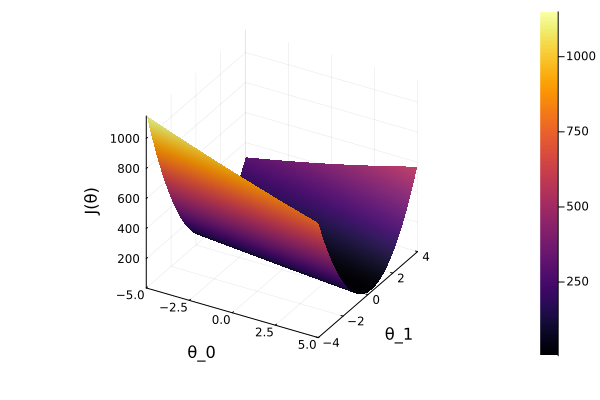

In [185]:
plot(u,v,W, st=:surface, xlabel="θ_0", ylabel="θ_1", zlabel="J(θ)")

In [186]:
∇J(X, y, θ) = X'*(X*θ - y)/length(y)

∇J (generic function with 1 method)

In [187]:
function bgd(X, y, θ_start, α, T=10000)
    θ = θ_start
    θs = []
    for t=1:T
        θ = θ - α*∇J(X, y, θ)
        push!(θs, θ)
    end
    return θs
end

bgd (generic function with 2 methods)

In [188]:
θ_start = zeros(2)
θs = bgd(X, y, θ_start, 0.01)

10000-element Vector{Any}:
 [0.05839135051546393, 0.6532884974555669]
 [0.06289175271039385, 0.7700097825599364]
 [0.05782292746142814, 0.7913481156584672]
 [0.05106362516077817, 0.795729810284954]
 [0.044014378365002625, 0.7970961782721866]
 [0.03692413114216264, 0.7979254732843951]
 [0.029837117577144856, 0.7986582394519285]
 [0.022761181894038862, 0.7993727912003019]
 [0.015697699574200162, 0.8000830518518655]
 [0.008646896228913565, 0.8007914983590768]
 ⋮
 [-3.895780819424374, 1.1930336382737075]
 [-3.895780819530524, 1.1930336382843714]
 [-3.895780819636483, 1.1930336382950162]
 [-3.8957808197422508, 1.1930336383056417]
 [-3.895780819847828, 1.193033638316248]
 [-3.895780819953215, 1.1930336383268354]
 [-3.895780820058412, 1.1930336383374036]
 [-3.8957808201634196, 1.1930336383479527]
 [-3.8957808202682376, 1.1930336383584828]

In [189]:
Js = map(θ -> J(X, y, θ), θs)

10000-element Vector{Float64}:
 6.737190464870009
 5.931593568604956
 5.901154707081388
 5.895228586444221
 5.890094943117332
 5.885004158443646
 5.8799324804914175
 5.874879094762575
 5.869843911806386
 5.864826865312929
 ⋮
 4.476971375975179
 4.476971375975179
 4.476971375975179
 4.476971375975179
 4.476971375975179
 4.476971375975179
 4.476971375975179
 4.476971375975179
 4.476971375975179

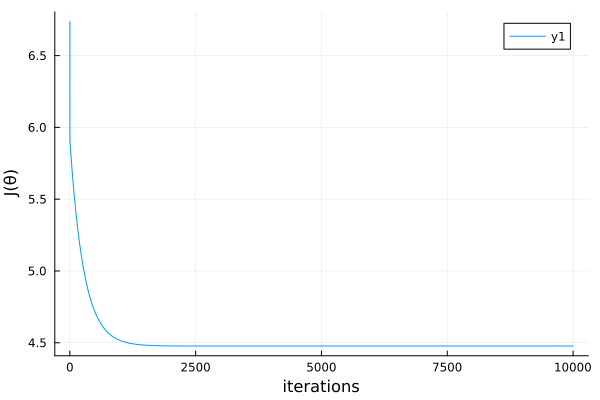

In [193]:
plot(1:10000, Js, xlabel="iterations", ylabel="J(θ)")